In [ ]:
'''
    Disciplina "IN1165 Tópicos Avançados em Inteligência Computacional"
    Atividade 1, estudo de algoritmos de inteligência artificial - Árvores de Decisão
    Descrição da atividade:
        Com base no Colab oferecido pelo professor da disciplina,
        foi feito teste com outra base [1].
    Dificuldades:
        A princípio, trabalhar com bases diferentes, com dados não numéricos é meu objetivo.
        Essa era similar a diabetes, ou seja, com números.
        A dissociação desta seria em que 1 representava indivícuos cardíacos e seus dados os demais.
        Usei DataSet.Replace e apliquei, renomeando 1 para 'cardiaco' e 0 'normal'
        Os resultados divegem pouco e atingi meu objetivo primário
        - estarei, adiante, estudando o uso de analise de dados com outras bases com mais descrições e menos números
        - prevejo trabalhar mais o Pandas
    Bibliografia:
        [1] KAGLE. Arquivo "cardio_train.csv". Disponível em <https://www.kaggle.com/datasets>. Acesso em 11 de Mar. de 2024.
'''

In [1]:
import pandas as pd

import pydotplus #pip install pydotplus
import numpy as np

In [2]:
df = pd.read_csv('cardio_train.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cardio'])
Y = df['cardio']#cardio é o dado que calcula acerto e erro, 1 é cardiaco

Y.replace(1,'cardiac')
Y.replace(0,'normal')

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 30)

dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30)

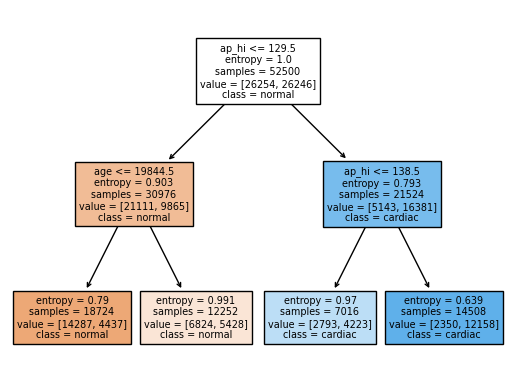

In [5]:
from sklearn import tree


tree.plot_tree(dt, feature_names = X.columns, class_names=['normal', "cardiac"],filled = True);

In [6]:
from sklearn.metrics import accuracy_score

Yhat = dt.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7132


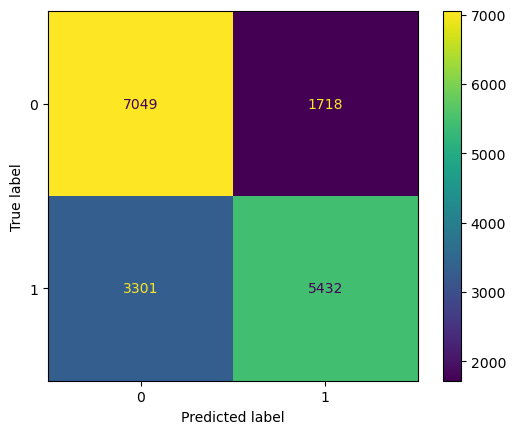

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_features = 3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

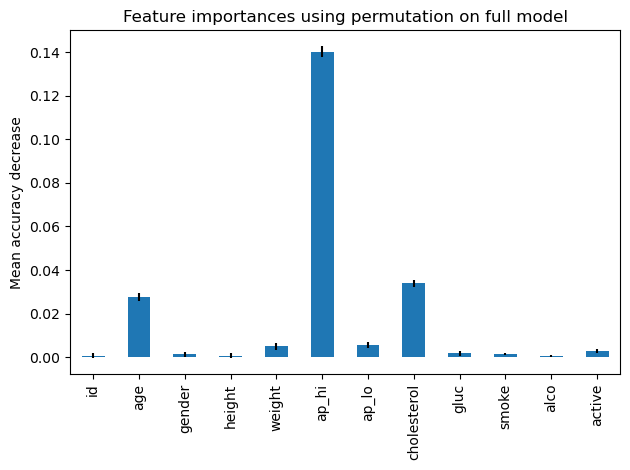

In [10]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7250285714285715


In [12]:
rf.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [13]:
rf.predict_proba(X_test)

array([[0.88, 0.12],
       [0.38, 0.62],
       [0.22, 0.78],
       ...,
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.64, 0.36]])

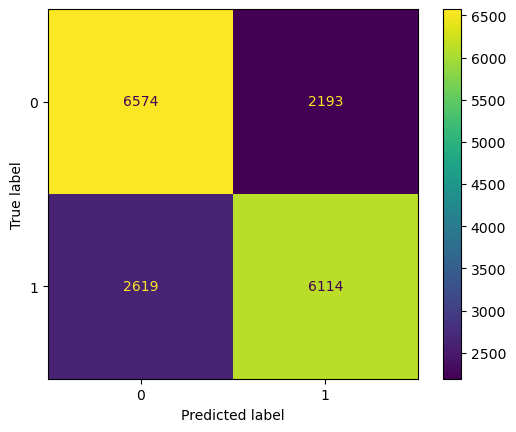

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()